In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
 random_state=5)

#---use a polynomial function of degree 2---
degree = 2
polynomial_features= PolynomialFeatures(degree = degree)
x_train_poly = polynomial_features.fit_transform(x_train)

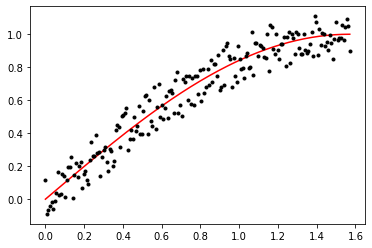

['1', 'x', 'x^2']
y절편: -0.037620985273124075
x계수: 1.2349999054639456 / x^2계수: -0.3670669258387218
결정계수: 0.9359212568376497
90도에 대한 예측값: [0.99661099]


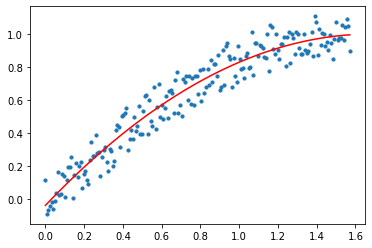

In [50]:
# 호도법으로 전환하기 위한 변수(1도의 라디안값)
deg = np.pi/180

# 0~90
#x_test = np.arange(0,91)
rad = np.linspace(start=0.0, stop=np.pi/2, num=200)
# * pi = 180도, pi/2 = 90도

# 0~90도에 해당하는 sin값 산출
y_origin = np.sin(rad)
# 노이즈 추가 (-0.15~ 0.15 사이의 랜덤한 실수)
y_test = y_origin + np.random.uniform(-0.15,0.15,200)

plt.plot(rad,y_origin,'r')
plt.plot(rad,y_test,'k.')
plt.show()

# train을 위한 준비
x_train = rad.reshape(-1,1)
x_poly = polynomial_features.fit_transform(x_train)
print(polynomial_features.get_feature_names('x_train'))

# 다항회귀모델 도출
model = LinearRegression()
model.fit(x_poly, y_test)

print('y절편:',model.intercept_)
print('x계수:',model.coef_[1], '/ x^2계수:',model.coef_[2])
print('결정계수:',model.score(x_poly,y_test))

# 예측 y값 산출
x_poly_pred = polynomial_features.fit_transform([[np.pi/2]])
y_poly_pred = model.predict(x_pred)
print('90도에 대한 예측값:',y_poly_pred)
plt.scatter(rad,y_test,s=10)

#---plot the regression line---
plt.plot(rad, model.predict(x_poly),c='r')
plt.show()

['1', 'x', 'y', 'x^2', 'x y', 'y^2']
R-Squared: 0.7340
26.93343052383921
[ 0.00000000e+00  1.47424550e+00 -6.70204730e+00  7.93570743e-04
 -3.66578385e-01  1.17188007e+00]


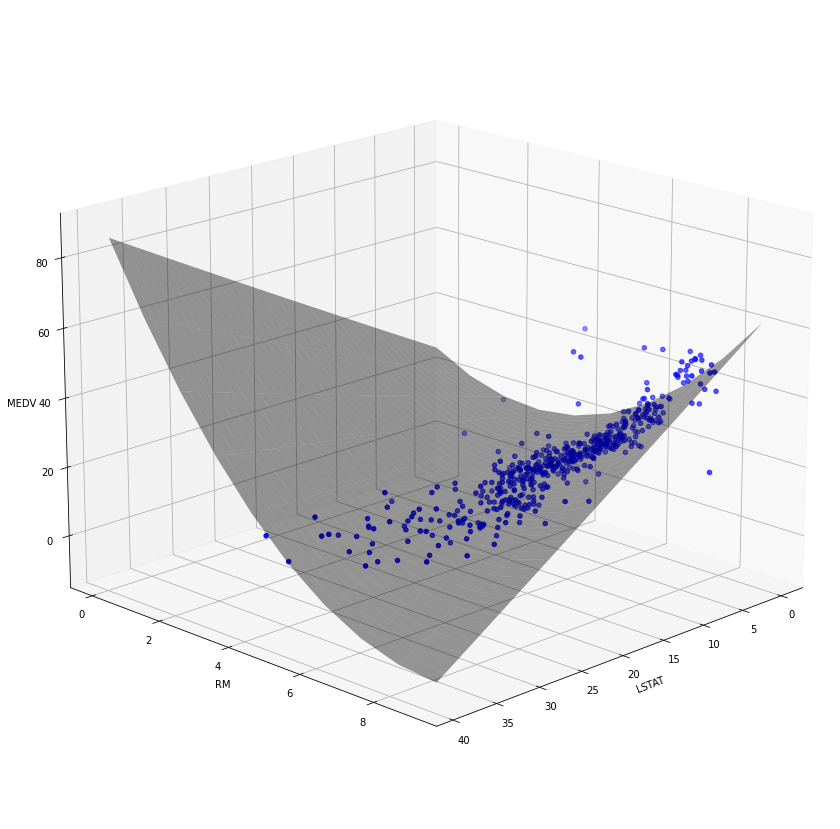

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5)

#---use a polynomial function of degree 2---
degree = 2 # 2차식
polynomial_features= PolynomialFeatures(degree = degree)
x_train_poly = polynomial_features.fit_transform(x_train)

#---print out the formula---
print(polynomial_features.get_feature_names(['x','y']))

model = LinearRegression()
model.fit(x_train_poly, Y_train)

x_test_poly = polynomial_features.fit_transform(x_test)
print('R-Squared: %.4f' % model.score(x_test_poly, Y_test))

print(model.intercept_)
print(model.coef_)

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['LSTAT'],
 x['RM'],
 Y,
 c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1) #---for LSTAT---   0~40까지 1간격으로 (인구밀도 데이터의 최저~최대치)
y_surf = np.arange(0, 10, 1) #---for RM---     0~10까지 1간격으로 (방 수 데이터의 최저~최대치)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
#---use a polynomial function of degree 2---
x_poly = polynomial_features.fit_transform(x)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ +
 (model.coef_[1] * x) +
 (model.coef_[2] * y) +
 (model.coef_[3] * x**2) +
 (model.coef_[4] * x*y) +
 (model.coef_[5] * y**2))
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
 rstride=1,
 cstride=1,
 color='None',
 alpha = 0.4)
ax.view_init(18, 45)
plt.show()

Text(0, 0.5, 'Logit - L')

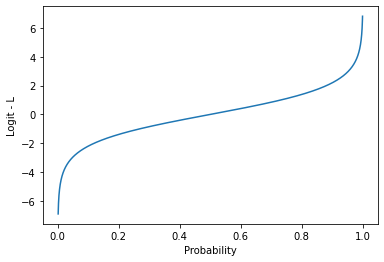

In [60]:
# logit 산출 함수 정의하기
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def logit(x):
 return np.log( x / (1 - x) )
x = np.arange(0.001,0.999, 0.0001)
y = [logit(n) for n in x]
plt.plot(x,y)
plt.xlabel("Probability")
plt.ylabel("Logit - L")

Text(0, 0.5, 'Probability')

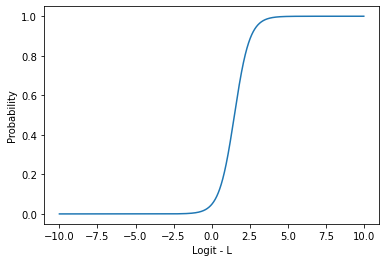

In [84]:
# 시그모이드 함수 선언
def sigmoid(x):
    a , b = -3,2
    return (1 / (1 + np.exp((a+b*x)*-1)))
x = np.arange(-10, 10, 0.0001)
y = [sigmoid(n) for n in x]
plt.plot(x,y)
plt.xlabel("Logit - L")
plt.ylabel("Probability")


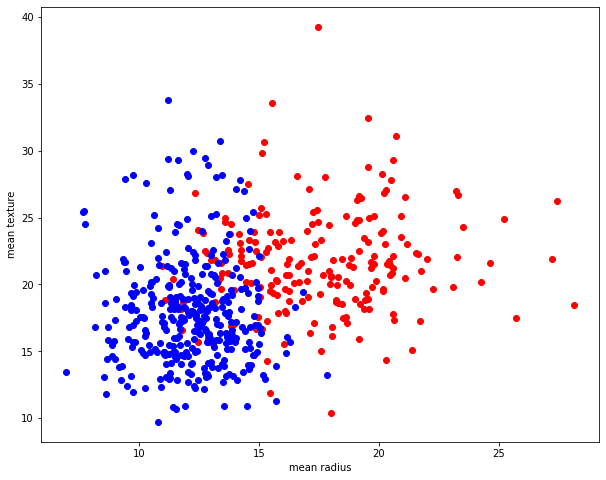

In [91]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#---copy from dataset into a 2-d list---
X = []
for target in range(2):
    X.append([[], []])
    for i in range(len(cancer.data)): # target is 0 or 1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # first feature -mean radius
            X[target][1].append(cancer.data[i][1]) # second feature —mean texture
colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for target in range(2):
    ax.scatter(X[target][0], X[target][1], c=colours[target])
# 빨간색이 악종(암), 파란색은 선종으로 판정된 데이터
# x축 - radius(종양의 반지름), y축 - texture(종양의 질감)
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()

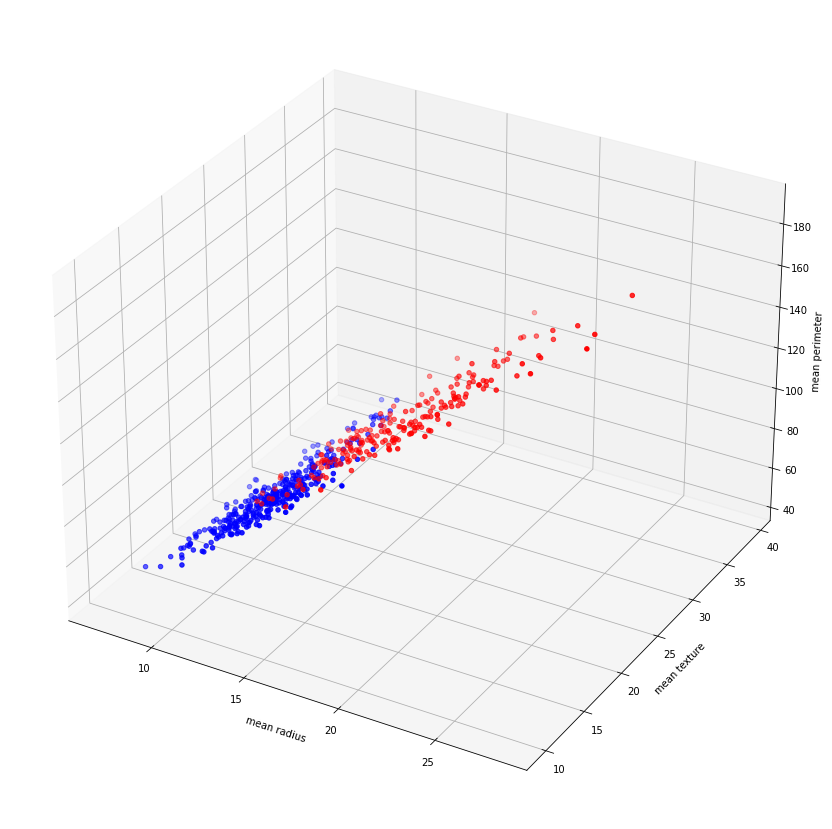

In [92]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#---copy from dataset into a 2-d array---
X = []
for target in range(2):
    X.append([[], [], []])
    for i in range(len(cancer.data)): # target is 0,1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            X[target][2].append(cancer.data[i][2])
colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0],
    X[target][1],
    X[target][2],
    c=colours[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

절편 [15.120902]
기울기 [[-1.02475609]]


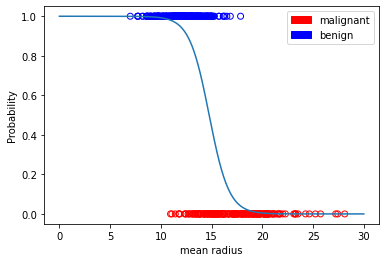

ValueError: Expected 2D array, got scalar array instead:
array=20.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [99]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # Load dataset
x = cancer.data[:,0] # mean radius
y = cancer.target # 0: malignant, 1: benign
colors = {0:'red', 1:'blue'} # 0: malignant, 1: benign

from sklearn import linear_model
import numpy as np
# 로지스틱 회귀모델 산출
log_regress = linear_model.LogisticRegression()
#---train the model---
log_regress.fit(X = np.array(x).reshape(len(x),1),
 y = y)
#---print trained model intercept---
print('절편',log_regress.intercept_) # [ 8.19393897]
#---print trained model coefficients---
print('기울기',log_regress.coef_) # [[-0.54291739]]
# 시그모이드 함수 정의
def sigmoid(x):
    return (1 / (1 + np.exp(-(log_regress.intercept_[0] +
                           (log_regress.coef_[0][0] * x)))))
# 가능한 x값과 그에 따른 시그모이드 함수의 결과값 변수선언
x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]
# 데이터 플로팅
plt.scatter(x,y,
            facecolors='none', edgecolors=pd.DataFrame(cancer.target)[0].apply(
                lambda x: colors[x]), cmap=colors)
plt.legend(handles=[red, blue], loc=1)
# 로지스틱 회귀모델 플로팅
plt.plot(x1,y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")
plt.show()

#print(log_regress.predict_proba(20)) # [[0.93489354 0.06510646]]
#print(log_regress.predict(20)[0]) # 0